# Marketing campaign Analysis Basics


## Imports

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Data wrangling

In [5]:
df = pd.read_csv('marketing1.csv')
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [6]:
df.shape

(10037, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


## Data Cleaning
1. Change Data types for 
    - date_served, date subscribed, date canceled -> datetime
    - converted, is retained -> bool  
    - age_group -> category
2. Add new columns for 
    - Day of the week
    - is correct language 
    - Encoding for marketing channel

In [8]:
# Channge the data types 
df['converted'] = df['converted'].astype('bool')
df['is_retained'] = df['is_retained'].astype('bool')
df['date_served'] = pd.to_datetime(df['date_served'])
df['date_subscribed'] = pd.to_datetime(df['date_subscribed'])
df['date_canceled'] = pd.to_datetime(df['date_canceled'])

In [9]:
df.dtypes

user_id                        object
date_served            datetime64[ns]
marketing_channel              object
variant                        object
converted                        bool
language_displayed             object
language_preferred             object
age_group                      object
date_subscribed        datetime64[ns]
date_canceled          datetime64[ns]
subscribing_channel            object
is_retained                      bool
dtype: object

In [10]:
for col in df.columns:
    if df[col].dtype == 'object' and col != 'user_id':
        print(30*'*', df[col].value_counts(), 30*'*', sep = '\n')

******************************
House Ads    4733
Instagram    1871
Facebook     1860
Push          993
Email         565
Name: marketing_channel, dtype: int64
******************************
******************************
control            5091
personalization    4946
Name: variant, dtype: int64
******************************
******************************
English    9793
Spanish     136
German       81
Arabic       27
Name: language_displayed, dtype: int64
******************************
******************************
English    9275
Spanish     450
German      167
Arabic      145
Name: language_preferred, dtype: int64
******************************
******************************
19-24 years    1682
24-30 years    1568
0-18 years     1539
30-36 years    1355
36-45 years    1353
45-55 years    1353
55+ years      1187
Name: age_group, dtype: int64
******************************
******************************
Instagram    600
Facebook     445
House Ads    354
Email        290
Push       

In [11]:
categories_ordered  =["0-18 years", "19-24 years", "24-30 years", '30-36 years', '36-45 years', '45-55 years',  '55+ years']
df['age_group'] = pd.Categorical(df['age_group'], categories= categories_ordered, ordered=True)

In [12]:
# Add the new columns
channel_dict = {"House Ads": 1, "Instagram": 2, 
                "Facebook": 3, "Email": 4, "Push": 5}

# Map the channel to a channel code
df['channel_code'] = df['subscribing_channel'].map(channel_dict)
                                                   
df['is_correct_lang'] = np.where(df['language_preferred'] == df['language_displayed'], 
                                        'Yes', 'No')

df['DoW'] = df['date_served'].dt.day_name()
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_lang,DoW
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0,Yes,Monday
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0,Yes,Monday
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0,Yes,Monday
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0,Yes,Monday
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0,Yes,Monday


In [13]:
df.isna().sum()

user_id                   0
date_served              16
marketing_channel        15
variant                   0
converted                 0
language_displayed        0
language_preferred        0
age_group                 0
date_subscribed        8181
date_canceled          9460
subscribing_channel    8181
is_retained               0
channel_code           8181
is_correct_lang           0
DoW                      16
dtype: int64

In [14]:
df.describe(include='object')

,user_id,marketing_channel,variant,language_displayed,language_preferred,subscribing_channel,is_correct_lang,DoW
count,10037,10022,10037,10037,10037,1856,10037,10021
unique,7309,5,2,4,4,5,2,7
top,a100000882,House Ads,control,English,English,Instagram,Yes,Monday
freq,12,4733,5091,9793,9275,600,9515,1993


# EDA
## Univariant analysis

<AxesSubplot:xlabel='marketing_channel', ylabel='count'>

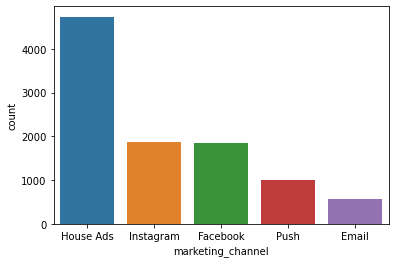

In [16]:
# chnnels 
sns.countplot(data = df, x = 'marketing_channel', order = df['marketing_channel'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='age_group'>

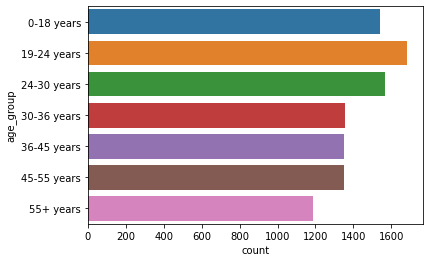

In [17]:
# age
sns.countplot(data = df, y = 'age_group')

<AxesSubplot:xlabel='language_displayed', ylabel='count'>

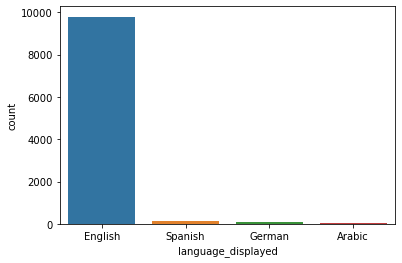

In [18]:
# language_displayed 
sns.countplot(data = df, x = 'language_displayed', order = df['language_displayed'].value_counts().index)

<AxesSubplot:xlabel='is_retained', ylabel='count'>

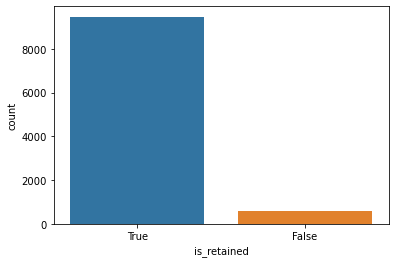

In [19]:
sns.countplot(data = df, x = 'is_retained', order = df['is_retained'].value_counts().index)

**The conclusion from the previous analysis is**
- The most common way for advertisement is house ads
- The most common/ preferred language is *English*
- the users ages are well spread however the most common age group is *19-24* and the least common is *55+ years* old 

## Bivariant analysis

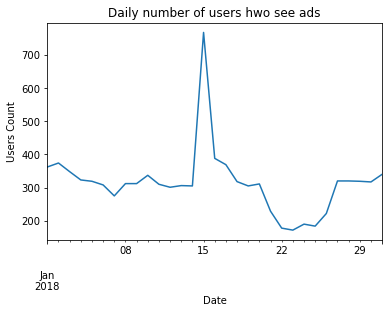

In [20]:
# number of new user per day
new_users = df.groupby(['date_served'])['user_id'].nunique()
new_users.plot()
plt.title("Daily number of users hwo see ads")
plt.xlabel("Date")
plt.ylabel("Users Count")
plt.show();

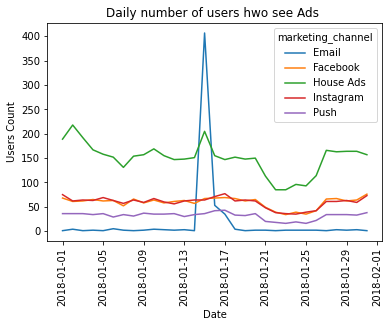

In [56]:
# number of new user per day
new_users = df.groupby(['date_served', 'marketing_channel'])['user_id'].nunique().reset_index()
sns.lineplot(x = 'date_served' ,y = 'user_id', data = new_users, hue = 'marketing_channel')
plt.title("Daily number of users hwo see Ads ")
plt.xlabel("Date")
plt.ylabel("Users Count")
plt.xticks(rotation = 90)
plt.show();

**It looks like the company send emails in bulk at the middle of the month**

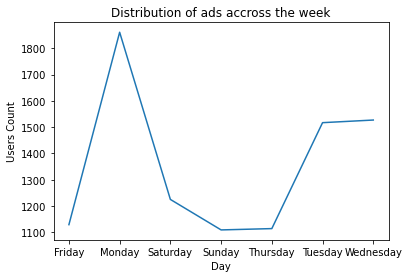

In [21]:
# number of new user per day
new_users = df.groupby(['DoW'])['user_id'].nunique()
new_users.plot()
plt.title("Distribution of ads accross the week")
plt.xlabel("Day")
plt.ylabel("Users Count")
plt.show();

# Metrics
## 1. Conversion Rate
Conversion rate = $\frac {Converted Users}{Total Users}$

In [22]:
# Calculate the total conversion rate 
total_users = df['user_id'].nunique()
subscribers = df[df["converted"] == True]['user_id'].nunique()

conversion_rate = subscribers/total_users
print(round(conversion_rate*100, 2), "%")

14.09 %


In [23]:
def conversion_rate(dataframe, column_names):
    # Total number of converted users
    column_conv = dataframe[dataframe['converted'] == True].groupby(column_names)['user_id'].nunique()

    # Total number users
    column_total = dataframe.groupby(column_names)['user_id'].nunique()   
    
    # Conversion rate 
    conversion_rate = column_conv/column_total
    
    # Fill missing values with 0
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

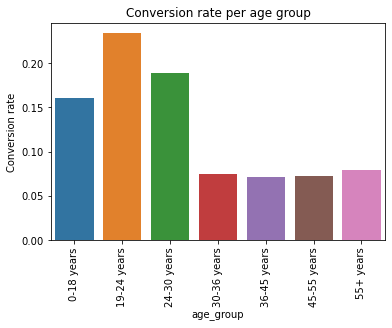

In [24]:
# conversion rate per age group
conversion_age = conversion_rate(df, 'age_group')
sns.barplot(x = conversion_age.index, y = conversion_age)
plt.xticks(rotation = 90)
plt.ylabel('Conversion rate')
plt.title("Conversion rate per age group")
plt.show();

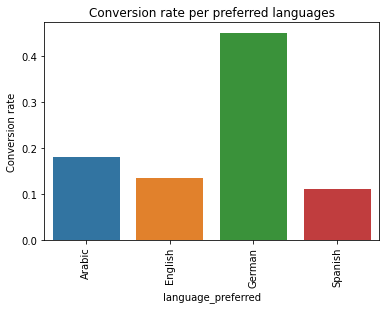

In [25]:
# conversion rate per language
conversion_lang = conversion_rate(df, 'language_preferred')
sns.barplot(x = conversion_lang.index, y = conversion_lang)
plt.xticks(rotation = 90)
plt.ylabel('Conversion rate')
plt.title("Conversion rate per preferred languages")
plt.show();

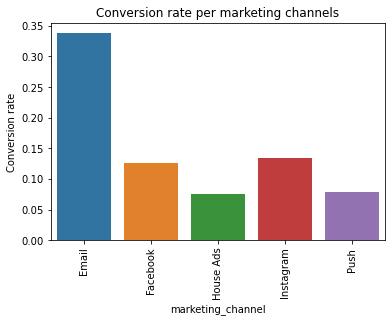

In [26]:
# conversion rate per language
conversion_channel = conversion_rate(df, 'marketing_channel')
sns.barplot(x = conversion_channel.index, y = conversion_channel)
plt.xticks(rotation = 90)
plt.ylabel('Conversion rate')
plt.title("Conversion rate per marketing channels")
plt.show();

***So far the Email channel has the best result***

### Daily conversion rate

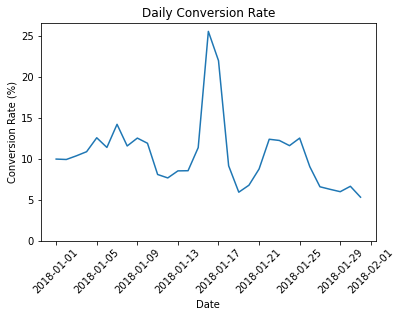

In [27]:
# Daily conversion rate
# Group by date_served and count unique users
total = df.groupby(['date_served'])['user_id'].nunique()

# Group by date_served and count unique converted users
daily_subscribers = df[df['converted'] == True].groupby(['date_served'])['user_id'].nunique()

# Calculate the conversion rate per day
daily_conversion_rate = round((daily_subscribers/total)*100,2)
plt.plot(daily_conversion_rate.index, daily_conversion_rate)
plt.title("Daily Conversion Rate")
plt.xlabel("Date")
plt.xticks(rotation = 45)
plt.ylim(0)
plt.ylabel("Conversion Rate (%)")
plt.show();

***The conversion rate seems to peek at the middle of the month***

In [75]:
def plotting_conv(dataframe):
    
    for column in dataframe:
        # Plot column by dataframe's index
        plt.plot(dataframe.index, dataframe[column])
        plt.title('Daily ' + str(column) + ' conversion rate\n', size = 16)
        plt.ylabel('Conversion rate', size = 14)
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation = 90)
        # Show plot
        plt.show()  
        plt.clf()

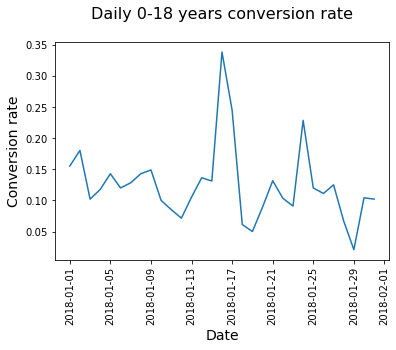

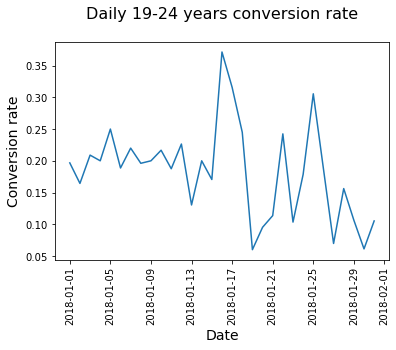

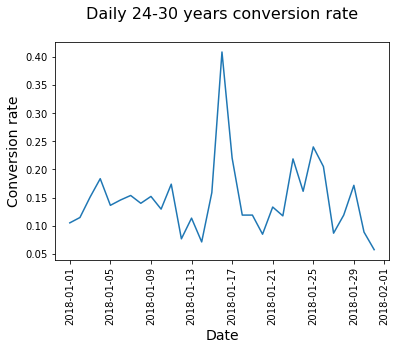

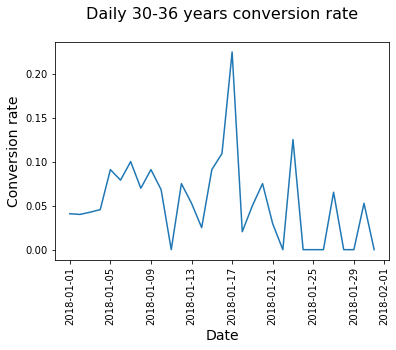

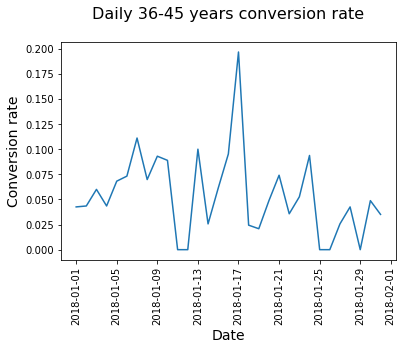

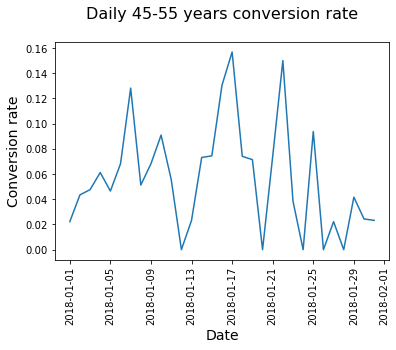

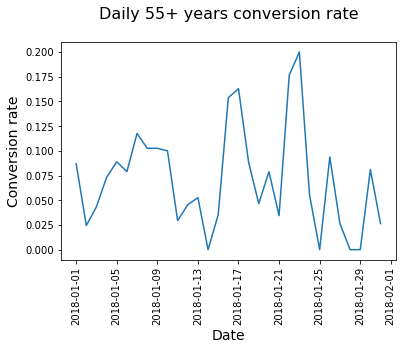

<Figure size 432x288 with 0 Axes>

In [76]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(df,['date_served', 'age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

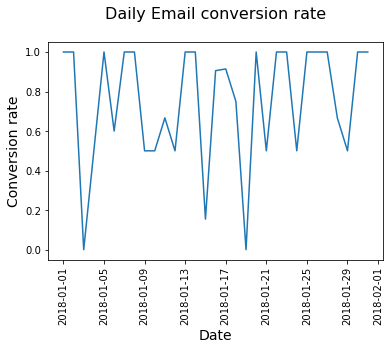

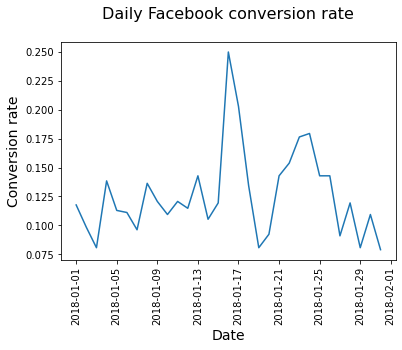

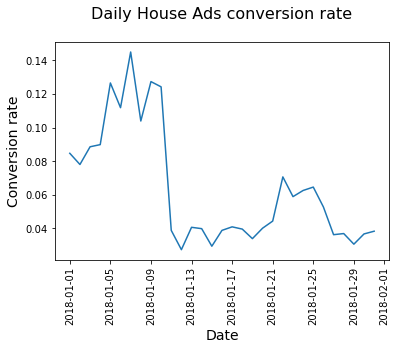

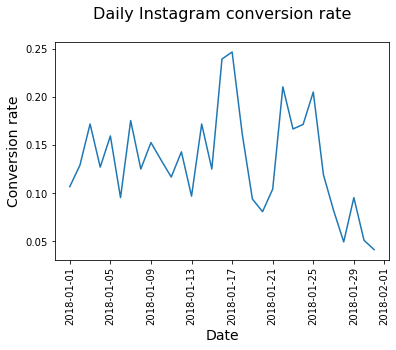

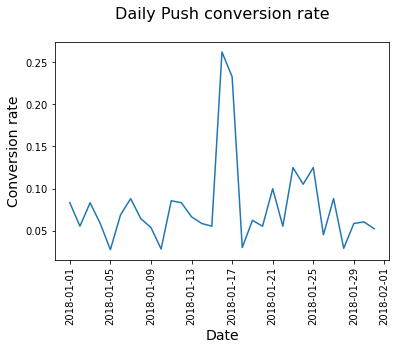

<Figure size 432x288 with 0 Axes>

In [30]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(df,['date_served', 'marketing_channel'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack(level=1))

# Plot the results
plotting_conv(age_group_df)

***The house ads channel conversion rate dipped at the middle of the month so we need to investigate that***

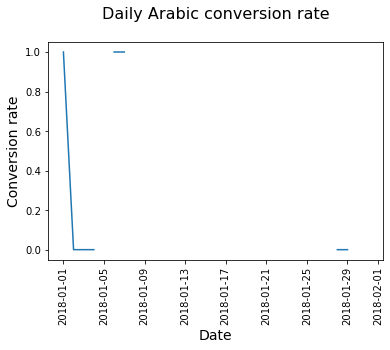

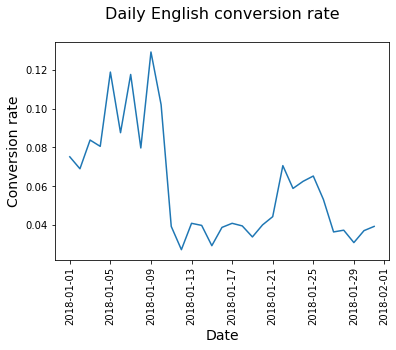

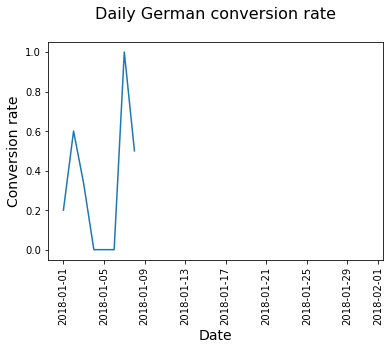

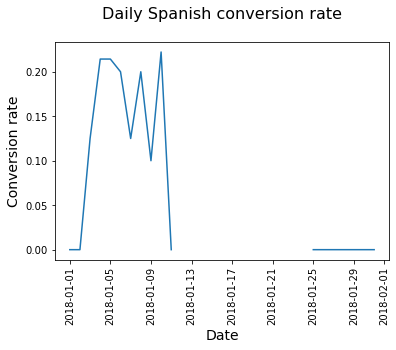

<Figure size 432x288 with 0 Axes>

In [31]:
# Isolate the rows where marketing channel is House Ads
house_ads = df[df['marketing_channel'] == 'House Ads']

# Calculate conversion by date served and language displayed
conv_lang_channel = conversion_rate(house_ads,['date_served', 'language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use plotting function to display results
plotting_conv(conv_lang_df)

***So only the english ads has been recieved every day in the month and the other languages stopped at the middle of the month***

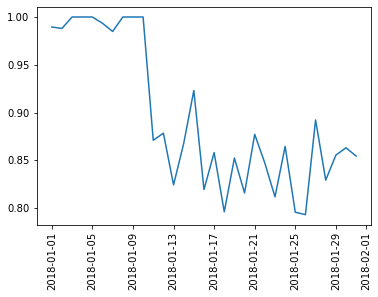

In [32]:
# Groupby date_served and is_correct_lang
language_check = house_ads.groupby(['date_served','is_correct_lang'])['is_correct_lang'].count()

# Unstack language_check and fill missing values with 0's
language_check_df = pd.DataFrame(language_check.unstack(level=1)).fillna(0)

# Divide the count where language is correct by the row sum
language_check_df['pct'] = language_check_df['Yes']/language_check_df.sum(axis=1)

# Plot and show your results
plt.plot(language_check_df.index.values, language_check_df['pct'])
plt.xticks(rotation = 90)
plt.show()

***The company started sending the ads with the wrong language to non english users starting from the middle of the month and that caused the converstion rate for the house ads channel to decrease***

## 2. Retension Rate
Retension rate = $\frac {Currently Converted Users}{Total Converted Users}$

In [33]:
# Calculate the retention rate (how much stayed of the new users for a month)
total_subscribers = df[df["converted"] == True]['user_id'].nunique()
retained_users    = df[(df["is_retained"] == True) & (df["converted"] == True) ]['user_id'].nunique()

retention_rate = retained_users/total_subscribers
print(round(retention_rate*100, 2), "%")

67.57 %


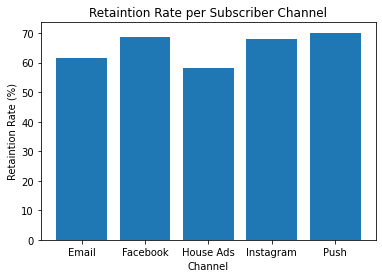

In [34]:
# Get the Retaintion rate for each channel
retained = df[(df["is_retained"] == True) & (df["converted"] == True)].groupby('subscribing_channel')['user_id'].nunique()
total_subscriber = df.groupby('subscribing_channel')['user_id'].nunique()

retention_rate = round((retained/total_subscriber)*100, 2)
plt.bar(retention_rate.index, retention_rate)
plt.title("Retaintion Rate per Subscriber Channel")
plt.xlabel("Channel")
plt.ylabel("Retaintion Rate (%)")
plt.show();

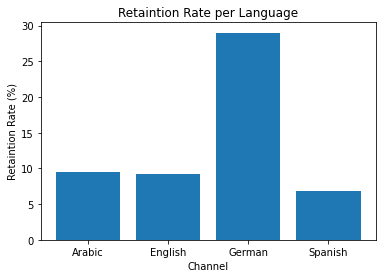

In [35]:
# Get the Retaintion rate for each channel
retained = df[(df["is_retained"] == True) & (df["converted"] == True)].groupby('language_preferred')['user_id'].nunique()
total_subscriber = df.groupby('language_preferred')['user_id'].nunique()

retention_rate = round((retained/total_subscriber)*100, 2)
plt.bar(retention_rate.index, retention_rate)
plt.title("Retaintion Rate per Language")
plt.xlabel("Channel")
plt.ylabel("Retaintion Rate (%)")
plt.show();

# Conclusion
- The campaign is more successful in optaining new users how are:
    - young adults
    - using email ads 
    - German speakers

## What was the impact of the House Ads problem?
Steps:
- find the conversion rate for the language before the flawed time frame
- find the ratio between CR for each language compared to english (to see if its better or worse and by how much){CRR)
- get the conversion rate for english in the flawed timeframe
- multiply the CR with the CRR to get the expected CR for each language
- multiply the expected CR by the number of users to know how many users we lost 


In [36]:
# Calculate pre-error conversion rate 
# Bug arose sometime around '2018-01-11' 
house_ads_no_bug = house_ads[house_ads['date_served'] < '2018-01-11'] 
lang_conv = conversion_rate(house_ads_no_bug, ['language_displayed']) 
lang_conv

language_displayed
Arabic     0.500000
English    0.099093
German     0.444444
Spanish    0.166667
Name: user_id, dtype: float64

In [78]:
# Index other language conversion rate ratio against English 
spanish_crr = lang_conv['Spanish']/lang_conv['English'] 
arabic_crr = lang_conv['Arabic']/lang_conv['English'] 
german_crr = lang_conv['German']/lang_conv['English']
spanish_crr, arabic_crr, german_crr

(1.681924882629108, 5.045774647887324, 4.485133020344287)

**Typically all other language has higher conversion rate compared to english**

In [38]:
# Create actual conversion DataFrame 
language_conversion = house_ads.groupby(['date_served','language_preferred']).agg({'user_id':'nunique'
                                                                                   , 'converted':'sum'}) 
language_conversion

user_id  converted
date_served language_preferred                    
2018-01-01  Arabic                    2          2
            English                 171         13
            German                    5          1
            Spanish                  11          0
2018-01-02  Arabic                    3          0
...                                 ...        ...
2018-01-30  Spanish                  18          2
2018-01-31  Arabic                    7          1
            English                 130          4
            German                    4          0
            Spanish                  16          1

[119 rows x 2 columns]

In [39]:
converted = pd.DataFrame(language_conversion.unstack(level=1)) 
converted.head()

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-01             2.0   171.0    5.0    11.0       2.0    13.0    1.0   
2018-01-02             3.0   200.0    5.0    10.0       0.0    14.0    3.0   
2018-01-03             2.0   179.0    3.0     8.0       0.0    15.0    1.0   
2018-01-04             2.0   149.0    2.0    14.0       0.0    12.0    0.0   
2018-01-05             NaN   143.0    1.0    14.0       NaN    17.0    0.0   

                            
language_preferred Spanish  
date_served                 
2018-01-01             0.0  
2018-01-02             0.0  
2018-01-03             1.0  
2018-01-04             3.0  
2018-01-05             3.0

In [90]:
# Create English conversion rate column for affected period
converted['english_conv_rate'] = converted.loc['2018-01-11':'2018-01-31'][('converted','English')]\
               
# Create expected conversion rates for each language
converted['expected_spanish_rate'] = converted['english_conv_rate']*spanish_crr
converted['expected_arabic_rate'] = converted['english_conv_rate']*arabic_crr
converted['expected_german_rate'] = converted['english_conv_rate']*german_crr

# Multiply number of users by the expected conversion rate
converted['expected_spanish_conv'] = converted['expected_spanish_rate']/100 * converted[('user_id','Spanish')]
converted['expected_arabic_conv'] = converted['expected_arabic_rate']/100*converted[('user_id','Arabic')]
converted['expected_german_conv'] = converted['expected_german_rate']/100*converted[('user_id','German')]


In [91]:
converted.tail()

user_id                        converted                 \
language_preferred  Arabic English German Spanish    Arabic English German   
date_served                                                                  
2018-01-27             3.0   148.0    3.0    12.0       1.0     4.0    0.0   
2018-01-28             5.0   134.0    3.0    21.0       0.0     4.0    0.0   
2018-01-29             7.0   138.0    4.0    15.0       2.0     3.0    0.0   
2018-01-30             4.0   139.0    3.0    18.0       0.0     4.0    0.0   
2018-01-31             7.0   130.0    4.0    16.0       1.0     4.0    0.0   

                           english_conv_rate expected_spanish_rate  \
language_preferred Spanish                                           
date_served                                                          
2018-01-27             1.0               4.0              6.727700   
2018-01-28             2.0               4.0              6.727700   
2018-01-29             0.0               3.0              5.045775   
2018-01-30             2.0               4.0              6.727700   
2018-01-31             1.0               4.0              6.727700   

                   expected_arabic_rate expected_german_rate  \
language_preferred                                             
date_served                                                    
2018-01-27                    20.183099            17.940532   
2018-01-28                    20.183099            17.940532   
2018-01-29                    15.137324            13.455399   
2018-01-30                    20.183099            17.940532   
2018-01-31                    20.183099            17.940532   

                   expected_spanish_conv expected_arabic_conv  \
language_preferred                                              
date_served                                                     
2018-01-27                      0.807324             0.605493   
2018-01-28                      1.412817             1.009155   
2018-01-29                      0.756866             1.059613   
2018-01-30                      1.210986             0.807324   
2018-01-31                      1.076432             1.412817   

                   expected_german_conv  
language_preferred                       
date_served                              
2018-01-27                     0.538216  
2018-01-28                     0.538216  
2018-01-29                     0.538216  
2018-01-30                     0.538216  
2018-01-31                     0.717621

In [95]:
# Use .loc to slice only the relevant dates
converted = converted.loc['2018-01-11':'2018-01-31']

# Sum expected subscribers for each language
expected_subs = converted['expected_spanish_conv'].sum() + converted['expected_arabic_conv'].sum() + converted['expected_german_conv'].sum()

# Calculate how many subscribers we actually got
actual_subs = converted[('converted','Spanish')].sum() + converted[('converted','Arabic')].sum() + converted[('converted','German')].sum()

# Subtract how many subscribers we lost despite the bug
lost_subs = expected_subs - actual_subs

print("Total Expected Subscribers is:",   round(expected_subs,0),
     "\nTotal Subscribers is:",   round(actual_subs,0),
      "\nLost Subs : ", round(lost_subs,0))

Total Expected Subscribers is: 58.0 
Total Subscribers is: 26.0 
Lost Subs :  32.0


# A/B Test on Emails

* H$_o : \mu_{control}$ = $\mu_{personalized}$
* H$_1 : \mu_{control}$ < $\mu_{personalized}$
* confidence level is 95 % --> $\alpha$	 = 0.05
* p_value < 0.05 means that the test was statistically significant and we can reject the null hypothesis

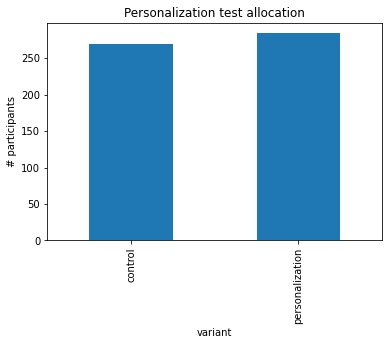

In [43]:
# Subset the DataFrame
email = df[df['marketing_channel'] == 'Email']

# Group the email DataFrame by variant 
alloc = email.groupby(['variant'])['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind='bar')
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

In [44]:
# Group marketing by user_id and variant
subscribers = email.groupby(['user_id', 'variant'])['converted'].max()  
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 
subscribers_df.head(10)

variant,control,personalization
user_id,,
a100000526,NaN,True
a100000530,NaN,True
a100000534,NaN,False
a100000538,NaN,True
a100000542,NaN,True
a100000546,NaN,True
a100000550,NaN,True
a100000554,NaN,False
a100000558,NaN,True


## Metrics
### 1. Conversion Rate

In [45]:
# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


### 2. Lift

In [97]:
# lift tells us how much one group is better than the other group
def lift(a,b):
    # Calcuate the mean of a and b
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift =( b_mean - a_mean) / a_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print("The personalization grouop is better than the control group by: ",lift(control, personalization))

The personalization grouop is better than the control group by:  38.85%


### 3. T Distribution

In [47]:
from scipy.stats import ttest_ind 

t = ttest_ind(control, personalization) 

print(t) 

Ttest_indResult(statistic=-2.7343299447505074, pvalue=0.006451487844694175)


**The personalized email are statistically significant for increasing the conversion rete, But does it work well with all users**

### Customer segmentation

In [48]:
def ab_segmentation(segment):
    
  # Build a for loop for each segment in marketing
  for subsegment in np.unique(df[segment].values):
    print(subsegment)
      
    # Limit marketing to email and subsegment      
    email = df[(df['marketing_channel'] == 'Email') & (df[segment] == subsegment)]

    subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
    subscribers = pd.DataFrame(subscribers.unstack(level=1)) 
    control = subscribers['control'].dropna()
    personalization = subscribers['personalization'].dropna()

    print('lift:', lift(control, personalization))
    print('t-statistic:', ttest_ind(control, personalization), '\n\n')

In [49]:
# Use ab_segmentation on language displayed
ab_segmentation('language_displayed')

Arabic
lift: 50.0%
t-statistic: Ttest_indResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001) 


English
lift: 39.0%
t-statistic: Ttest_indResult(statistic=-2.2183598646203166, pvalue=0.026991701290720815) 


German
lift: -1.62%
t-statistic: Ttest_indResult(statistic=0.1910083418078718, pvalue=0.8494394170062678) 


Spanish
lift: 166.67%
t-statistic: Ttest_indResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524) 




**We can see that the test was significant only with spanish and english users only**

In [50]:
# Use ab_segmentation on age group
ab_segmentation('age_group')

0-18 years
lift: 121.4%
t-statistic: Ttest_indResult(statistic=-2.966044912142211, pvalue=0.0038724494391297226) 


19-24 years
lift: 106.24%
t-statistic: Ttest_indResult(statistic=-3.03179438478667, pvalue=0.0030623836114689134) 


24-30 years
lift: 161.19%
t-statistic: Ttest_indResult(statistic=-3.861539544326876, pvalue=0.00018743381094867337) 


30-36 years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.1859064644147996, pvalue=0.0023238487431765137) 


36-45 years
lift: -85.23%
t-statistic: Ttest_indResult(statistic=2.4317901279318503, pvalue=0.01797568600978829) 


45-55 years
lift: -72.22%
t-statistic: Ttest_indResult(statistic=2.065499127317933, pvalue=0.043062339688201196) 


55+ years
lift: -100.0%
t-statistic: Ttest_indResult(statistic=3.3265654564203397, pvalue=0.0016358623456360435) 




**The test performed well across younger users (the lift is +ve) and didn't do well from ages 30 and higher, This could be because younger users are more intersted in technology**

# Conclustion 
- The personalized emails has better results for users who are
    - Under the age of 30 years
    - speak english or spanish